# Plot Model Comparison
Plot all the stats of each results dir in the target as a combined graphs

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import os

def create_plot(directory):
    results = {}
    with plt.rc_context({'axes.edgecolor':'#ddd', 'xtick.color':'#ddd', 'ytick.color':'#ddd', 'figure.facecolor':'#ddd'}):
        for dir in os.listdir(directory):
            f = directory + "/" + dir + "/epoch_stats.csv"

            with open(f) as csv_file:
                next(csv_file)
                val0 = []
                val1 = []
                val2 = []
                val3 = []
                val4 = []
                for row in csv_file:
                    row = row.split(",")
                    val0.append(float(row[0]))
                    val1.append(float(row[1]))
                    val2.append(float(row[2]))
                    val3.append(float(row[3]))
                    val4.append(row[4].replace("\n",""))

                results[dir] = {
                    "epochs": val0,
                    "training_loss": val1,
                    "valid_loss": val2,
                    "error_rate": val3,
                    "time": val4
                }
                
        
        for attr in ["training_loss", "valid_loss", "error_rate"]:
            plt.figure(facecolor='black',figsize=(14,10))
        
            ax = plt.axes()
            ax.set_facecolor("black")
            plt.title(attr.upper() + " : " + directory, color="white")
            plt.axhline(y = 0.05, color ="#333", linestyle ="--", linewidth = 1)
            plt.axhline(y = 0.1, color ="#333", linestyle ="-", linewidth = 1)
            plt.axhline(y = 0.15, color ="#333", linestyle ="--", linewidth = 1)
            plt.axhline(y = 0.2, color ="#333", linestyle ="-", linewidth = 1)
            plt.axhline(y = 0.25, color ="#333", linestyle ="--", linewidth = 1)
            plt.ylim(0, 0.25)
        
            for k, v in results.items():
            
                plt.plot(v["epochs"], v[attr],label=k)
        
            ax.legend(facecolor='white', framealpha=0,labelcolor='linecolor')
            
            plt.show()

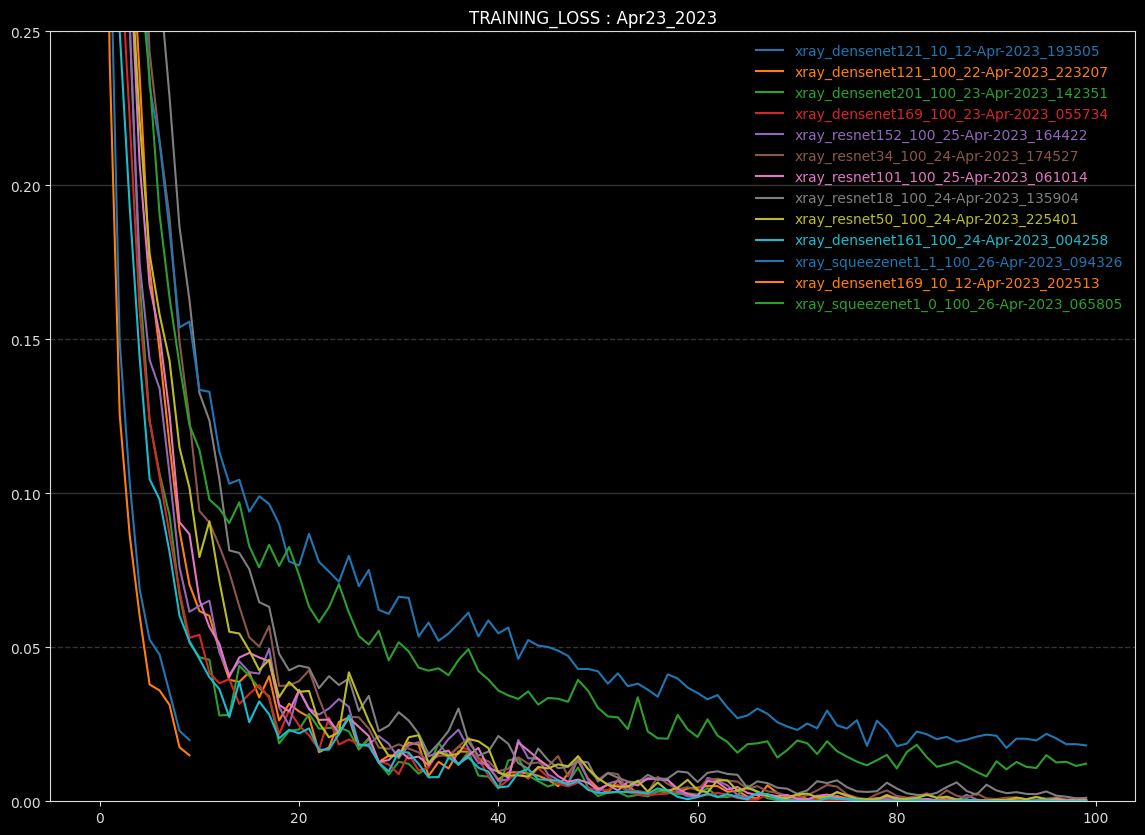

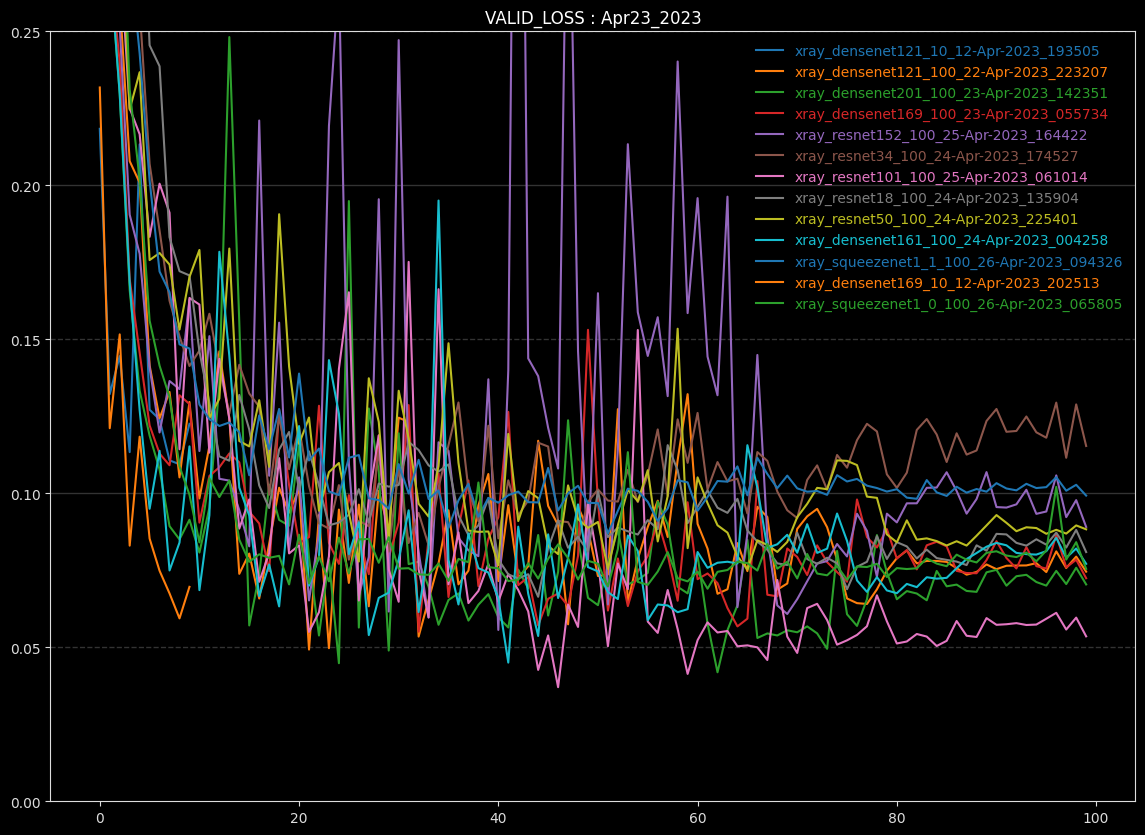

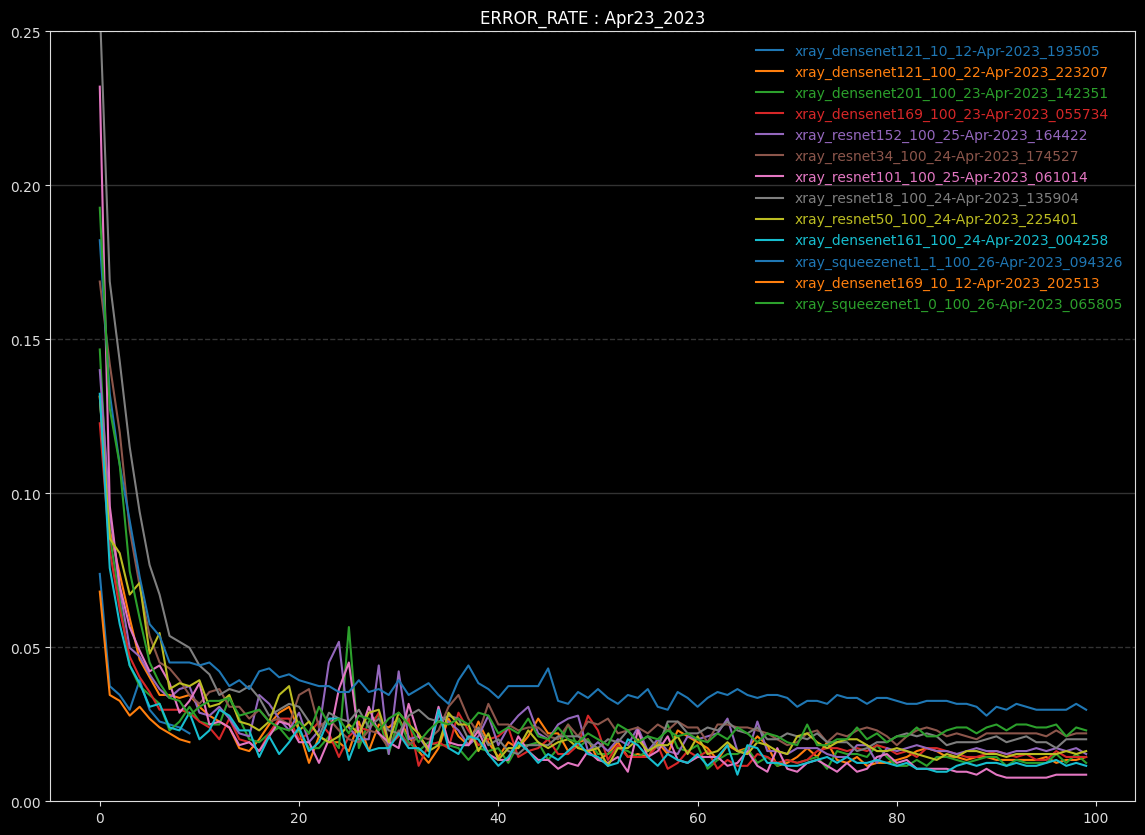

In [18]:
create_plot('Apr23_2023')